# 2.5 Visual Weather Systems CNN

## Contents
### 1. Import libraries and data
### 2. Run CNN to categorize images
### 3. View results

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

2025-11-21 10:22:02.359968: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#download the weather images and put them in a directory
path = r'/Users/susanwang/Documents/CF_ML/ML_Project/Data Sets/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


## 2. Run CNN to categorize images

In [4]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [13]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 6, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/6
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 988ms/step - accuracy: 0.7710 - loss: 0.0826 - val_accuracy: 0.7054 - val_loss: 0.1066
Epoch 2/6
 1/28 ━━━━━━━━━━━━━━━━━━━━ 23s 855ms/step - accuracy: 0.6250 - loss: 0.1240

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.6250 - loss: 0.1240 - val_accuracy: 0.7054 - val_loss: 0.1175
Epoch 3/6
28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8308 - loss: 0.0596 - val_accuracy: 0.8125 - val_loss: 0.0732
Epoch 4/6
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8438 - loss: 0.0607 - val_accuracy: 0.7812 - val_loss: 0.0755
Epoch 5/6
28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8343 - loss: 0.0625 - val_accuracy: 0.7366 - val_loss: 0.0920
Epoch 6/6
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9375 - loss: 0.0369 - val_accuracy: 0.7812 - val_loss: 0.0901


## 3. View results

In [15]:
results = pd.DataFrame(model.history.history)

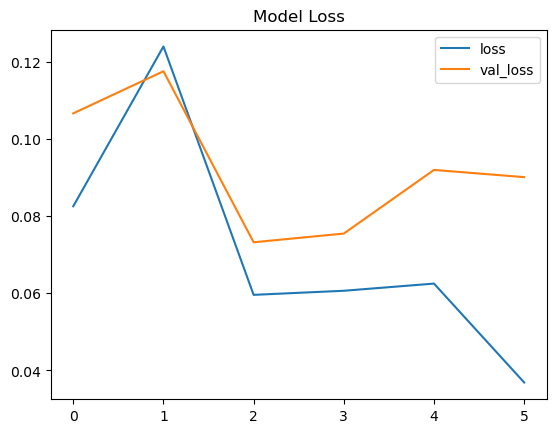

In [16]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

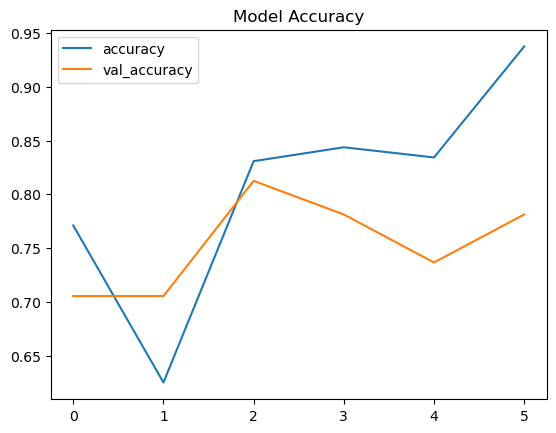

In [17]:
results[['accuracy','val_accuracy']].plot(title='Model Accuracy')
plt.savefig('./accuracy.png')

In [18]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9375, Val_Accuracy: 0.78125
Loss: 0.03689593821763992, Val_Loss: 0.09010588377714157


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step


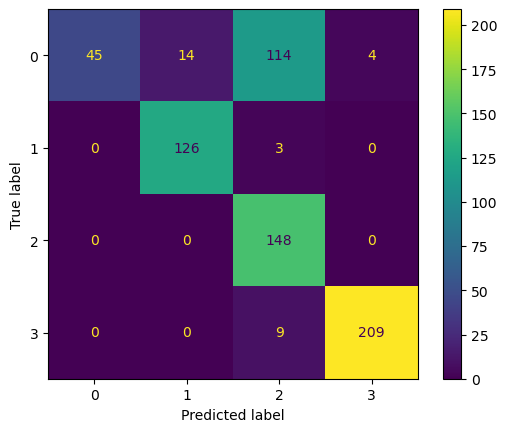

In [19]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 20 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [20]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


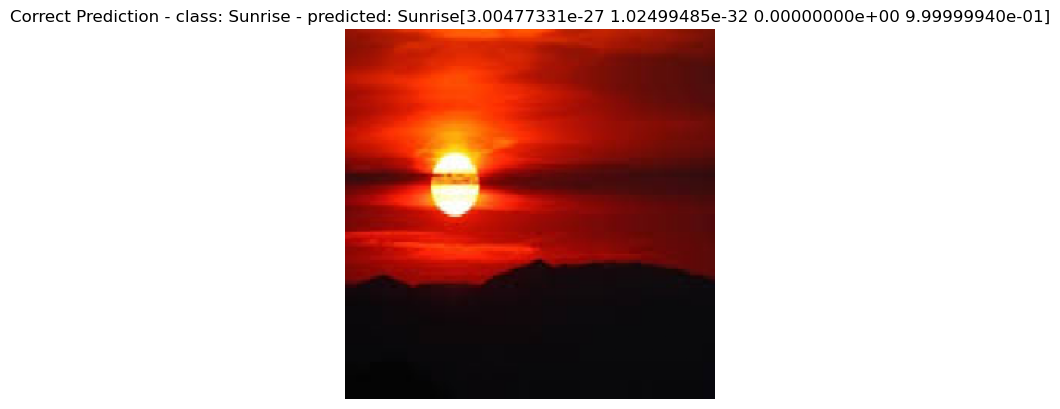

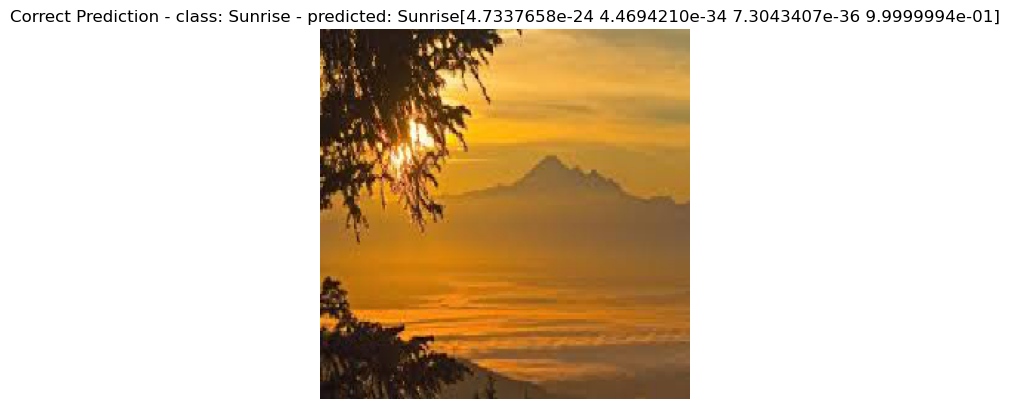

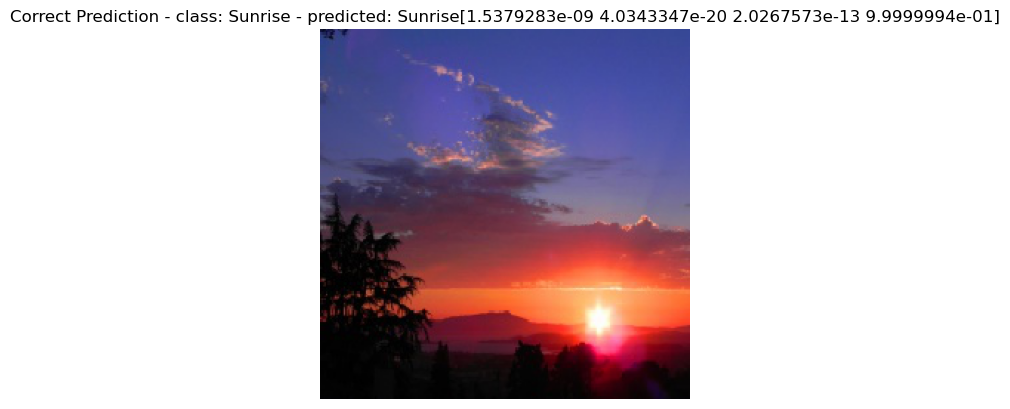

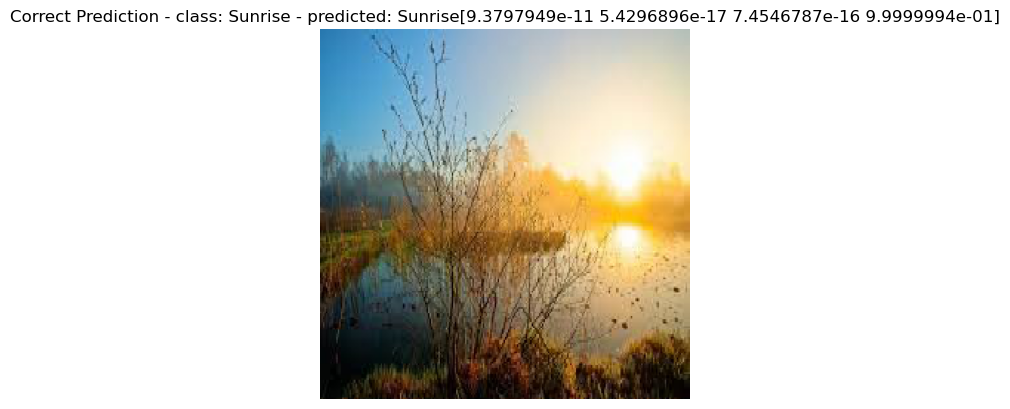

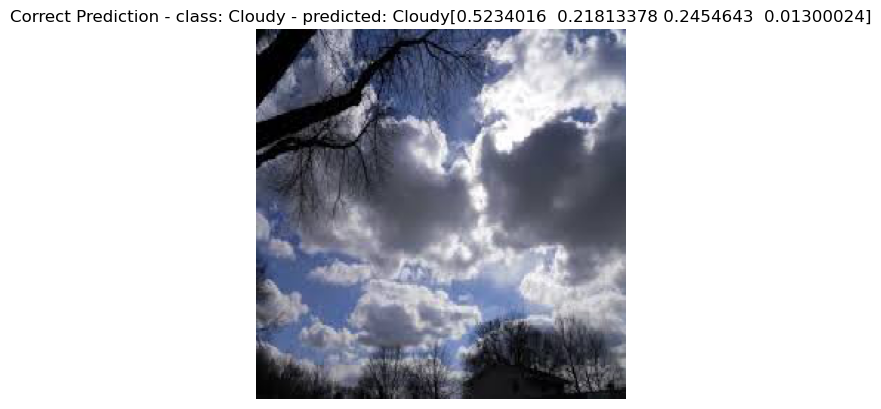

In [12]:
predict_one(model, 5) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

In [ ]:
# upload own photo and predict
img = 
pred_img = model.predict(img)

        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)